In [14]:
from matplotlib import pyplot as plt

cluster_threshold = 0.6

# known viral contigs
with open('/content/drive/MyDrive/KGI Internship/viral pred/GoodContigs.txt', 'r') as f:
    good_contigs = f.readlines()

i = 0
while i < len(good_contigs):
    good_contigs[i] = good_contigs[i].strip()
    i += 1

contig_dict = {}
cluster_dict = {}

# k:v = contig : representative genes of clusters it appears in
with open('/content/drive/MyDrive/KGI Internship/viral pred/contig_dict.txt', 'r') as f:
    contig_lines = f.readlines()

i = 0
while i < len(contig_lines):
    contig_lines[i] = contig_lines[i].strip()[:-1]
    i += 1

# k:v = representative gene : genes in same cluster
with open('/content/drive/MyDrive/KGI Internship/viral pred/cluster_dictionary.txt', 'r') as f:
    cluster_lines = f.readlines()

i = 0
while i < len(cluster_lines):
    cluster_lines[i] = cluster_lines[i].strip()[:-1]
    i += 1


for line in contig_lines:
    contig_dict[line[:line.index(':')]] = list(line[line.index(':') + 2:].split(','))

for line in cluster_lines:
    cluster_dict[line[:line.index(':')]] = list(line[line.index(':') + 2:].split(','))

# Run to get predicted viral clusters
# # k:v = representative gene : percent of genes in cluster in known viral contigs
# print('Filtering clusters...')
# pred_clusters = ['test']
# index = 1
# for cluster in cluster_dict.keys():
#     size = 1.0 * len(cluster_dict[cluster])
#     known_viral = 0.0
#     for gene in cluster_dict[cluster]:
#         if gene[:gene.index('_')] in good_contigs:
#             known_viral += 1.0
#     prop = known_viral / size
#     if prop >= cluster_threshold:
#         print(f'#{index}/{len(cluster_dict.keys())}\t{cluster} {round(prop * 1000) / 1000}, ACCEPTED!')
#         pred_clusters.append(cluster)
#     else:
#         print(f'#{index}/{len(cluster_dict.keys())}\t{cluster} {round(prop*1000) / 1000}, rejected :(')
#     index += 1

# with open('/content/drive/MyDrive/KGI Internship/viral pred/pred_clusters.txt', 'w+') as f:
#     for i in pred_clusters:
#         f.write(i + '\n')

In [2]:
!grep VMHT /content/drive/MyDrive/KGI\ Internship/viral\ pred/prodigal_pred_proteins > /content/drive/MyDrive/KGI\ Internship/viral\ pred/prodigal_pred_proteins_real.txt

In [3]:
!head /content/drive/MyDrive/KGI\ Internship/viral\ pred/prodigal_pred_proteins_real.txt

>VMHT01000001.1_1 # 3 # 308 # -1 # ID=1_1;partial=10;start_type=ATG;rbs_motif=None;rbs_spacer=None;gc_cont=0.359
>VMHT01000001.1_2 # 308 # 790 # -1 # ID=1_2;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.340
>VMHT01000001.1_3 # 793 # 1704 # -1 # ID=1_3;partial=00;start_type=ATG;rbs_motif=None;rbs_spacer=None;gc_cont=0.364
>VMHT01000001.1_4 # 1704 # 5051 # -1 # ID=1_4;partial=01;start_type=Edge;rbs_motif=None;rbs_spacer=None;gc_cont=0.386
>VMHT01000002.1_1 # 1 # 1746 # -1 # ID=2_1;partial=10;start_type=ATG;rbs_motif=AGGA;rbs_spacer=5-10bp;gc_cont=0.437
>VMHT01000002.1_2 # 1748 # 2926 # -1 # ID=2_2;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.411
>VMHT01000002.1_3 # 2929 # 3534 # -1 # ID=2_3;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.467
>VMHT01000002.1_4 # 3870 # 4421 # 1 # ID=2_4;partial=00;start_type=ATG;rbs_motif=AGGA/GGAG/GAGG;rbs_spacer=11-12bp;gc_cont=0.562
>VMHT01000002.1_5 # 4414 # 5166 

In [ ]:
contig_to_gene = {}
with open('/content/drive/MyDrive/KGI Internship/viral pred/prodigal_pred_proteins_real.txt', 'r') as f:
  lines = f.readlines()
print(lines)
for line in lines:
  try:
    if line[1:line.index('_')] in contig_to_gene.keys():
      contig_to_gene[line[1:line.index('_')]].append(line[1:line.index(' ')])
    else:
      contig_to_gene[line[1:line.index('_')]] = [line[1:line.index(' ')]]
  except ValueError as e:
    print(e)
    print(line)
    continue
print('Dict: ' + str(contig_to_gene))

In [ ]:
print(list(contig_to_gene.items())[:10])

In [ ]:
# k:v = gene : representative gene of cluster it's in
gene_dict = {}
for cluster in cluster_dict.keys():
  for gene in cluster_dict[cluster]:
    gene_dict[gene] = cluster
print(list(gene_dict.items())[:10])

In [ ]:
with open('/content/drive/MyDrive/KGI Internship/viral pred/pred_clusters.txt', 'r') as f:
  pred_clusters = f.readlines()[1:]
i = 0
while i < len(pred_clusters):
  pred_clusters[i] = pred_clusters[i].strip()
  i += 1
print(pred_clusters[:10])
print(len(pred_clusters))

In [ ]:
0.6 * len(pred_clusters) / (len(cluster_dict))

In [ ]:
pred_contigs_full_stats = {}
pred_contigs = []
index = 1
contig_threshold = 0.6 * len(pred_clusters) / (len(cluster_dict)) # weight for # of viral clusters in sample
for contig in contig_dict.keys():
  if contig in good_contigs: continue
  total = len(contig_to_gene[contig])
  good = 0.0
  for gene in contig_to_gene[contig]:
    if gene_dict[gene] in pred_clusters:
      good += 1

  prop = good / total
  pred_contigs_full_stats[contig] = prop
  if prop >= contig_threshold:
      print(f'#{index}/{len(contig_dict.keys())}\t{contig} {round(prop * 1000) / 1000}, ACCEPTED! with {int(good)}/{total}')
      pred_contigs.append(cluster)
  else:
      print(f'#{index}/{len(contig_dict.keys())}\t{contig} {round(prop*1000) / 1000}, rejected :( with {int(good)}/{total}')
  index += 1
print(list(pred_contigs_full_stats.items())[:10])
print(len(pred_contigs))

In [ ]:
with open('/content/drive/MyDrive/KGI Internship/viral pred/pred_viral_contigs.txt', 'r') as f:
  pred_contigs = f.read().splitlines()

print(len(pred_contigs))
num_genes = [len(contig_to_gene[i]) for i in pred_contigs]
plt.hist(num_genes)
plt.xlabel('# of Genes in Pred. Viral Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

plt.figure()

plt.hist([len(i) for i in contig_to_gene.values()])
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# plt.figure()

# plt.hist([len(contig_to_gene[i]) for i in good_contigs])
# plt.xlabel('# of Genes in Known Viral Contig')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
num_good_genes = []
for i in good_contigs:
  if i in contig_to_gene.keys():
    num_good_genes.append(len(contig_to_gene[i]))

print(len(num_good_genes))
print(len(good_contigs))
print(sum(num_good_genes))

In [ ]:
print('known genes:', sum(num_good_genes))
print('pred genes:', sum(num_genes))
print('all genes:', sum([len(i) for i in contig_to_gene.values()]))

In [ ]:
plt.figure()

first_opacity, second_op, third_op = 0.4, 0.6, 1.0

first = [len(i) for i in contig_to_gene.values()]
binwidth=25

plt.hist(first, label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()

plt.hist([len(i) for i in contig_to_gene.values()], label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.hist(num_good_genes, label='Known Viral', color='lightblue', bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()

plt.hist([len(i) for i in contig_to_gene.values()], label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.hist([num_good_genes, num_genes], stacked=True, label=['Known Viral', 'Pred Viral'], color=['lightblue', 'lavenderblush'], bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
with open('/content/drive/MyDrive/KGI Internship/viral pred/prodigal_pred_proteins', 'r') as f:
  lines = f.read().splitlines()

In [ ]:
from re import I

def get_prot(gene):
  i = 0
  while gene not in lines[i]:
    i += 1
  actual_lines = lines[i:]
  j = 1
  prot = ''
  while actual_lines[j][0] != '>':
    prot += actual_lines[j].strip()
    j += 1
  return prot

rep_genes = list(cluster_dict.keys())
print(lines[:10])
print(len(lines))

rep_lines = []
done = 0
for i in rep_genes[:10]:
  _ = set([j[:j.index('_')] for j in cluster_dict[i]])
  rep_lines.append(f'>{i} # {len(cluster_dict[i])} # {len(_)}\n')
  rep_lines.append(f'{get_prot(i)}\n')
  done += 1
  print(f'done getting protein for {done}/{len(rep_genes)} genes')

for i in rep_lines[:10]:
  print(i)

print(len(rep_lines))

['>VMHT01000001.1_1 # 3 # 308 # -1 # ID=1_1;partial=10;start_type=ATG;rbs_motif=None;rbs_spacer=None;gc_cont=0.359', 'MANRVLLGKRGSTDHGLFVSRSGQDVLTSTQPLGFDSRAAESLILHSASQGILVPNVQDS', 'SGVQVSFTFNGVTENQHTATITHNLGYVPCFAVRWCTYNQIT', '>VMHT01000001.1_2 # 308 # 790 # -1 # ID=1_2;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.340', 'MANRIILGKNTNSNHGHSSGTPGFGLYISRPGKDVTTCTADELIFNTDNGTGTSLGRIIS', 'MYQLAPIPQAGGGTNTTTTSSITAGNAVTLDISSIDFGIDFGFISFGLLAPVTYGAGSTA', 'SSYDYNVSESLETITIENTGTTSLTVKSYVVPRYSNLALF*', '>VMHT01000001.1_3 # 793 # 1704 # -1 # ID=1_3;partial=00;start_type=ATG;rbs_motif=None;rbs_spacer=None;gc_cont=0.364', 'MANRILLGDIGSTFGLKVSRAGTDVTTGADKDMLFDSTKNRTGQIYGGGAGITFVDSSSD', 'QEAYVRGTANLYATPFTGQPNGGYTGKKIIIDGTTVTLSTTSSYFNYTYTTVDNMKTDIN']
14297422
done getting protein for 1/502235 genes
done getting protein for 2/502235 genes
done getting protein for 3/502235 genes
done getting protein for 4/502235 genes
done getting protein for 5/502235 genes
done getting prot

In [ ]:
with open('/content/drive/MyDrive/KGI Internship/viral pred/representative_clusters.txt', 'w+') as f:
  for i in rep_lines:
    f.write(i)

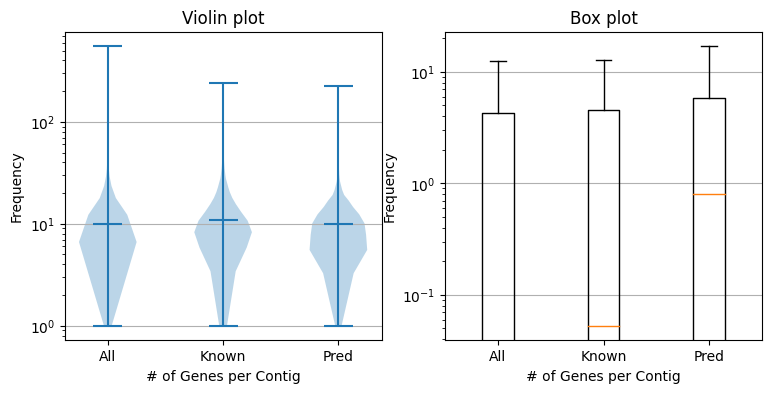

In [ ]:
all = [len(i) for i in contig_to_gene.values()]
known = num_good_genes
pred = num_genes

import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 9)]

# plot violin plot
axs[0].violinplot([all, known, pred],
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['All', 'Known', 'Pred'])
    ax.set_xlabel('# of Genes per Contig')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')

plt.show()